In [ ]:
! pip install akshare --upgrade
! pip install mplfinance

In [8]:
import akshare as ak

stock_cy_a_spot_em_df = ak.stock_cy_a_spot_em()
print(stock_cy_a_spot_em_df)

        序号      代码     名称    最新价    涨跌幅   涨跌额        成交量           成交额     振幅  \
0        1  300135   宝利国际   5.62  20.09  0.94  1737738.0  9.260291e+08  17.95   
1        2  300168   万达信息   9.34  20.05  1.56  1226436.0  1.103871e+09  21.59   
2        3  300437    清水源  12.16  20.04  2.03   156837.0  1.861151e+08  20.04   
3        4  300343   联创股份   7.25  20.03  1.21  2067355.0  1.453123e+09  20.36   
4        5  300081   恒信东方   8.63  20.03  1.44  1474951.0  1.178364e+09  22.67   
...    ...     ...    ...    ...    ...   ...        ...           ...    ...   
1390  1391  300117  *ST嘉寓   1.38  -2.13 -0.03  1080250.0  1.479625e+08   9.22   
1391  1392  300195   长荣股份   7.13  -2.19 -0.16  1022126.0  7.296274e+08  11.66   
1392  1393  300274   阳光电源  83.14  -2.28 -1.94   354581.0  2.954184e+09   2.54   
1393  1394  300380   安硕信息  58.22  -2.30 -1.37   243626.0  1.431878e+09   7.30   
1394  1395  300930   屹通新材  32.30  -3.29 -1.10   102448.0  3.391079e+08  10.48   

         最高  ...    量比    换

In [14]:
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170101", end_date='20241121', adjust="")
print(stock_zh_a_hist_df)

              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2017-01-03  000001   9.11   9.16   9.18   9.09   459840  4.205952e+08   
1     2017-01-04  000001   9.15   9.16   9.18   9.14   449330  4.115034e+08   
2     2017-01-05  000001   9.17   9.17   9.18   9.15   344373  3.157697e+08   
3     2017-01-06  000001   9.17   9.13   9.17   9.11   358154  3.271764e+08   
4     2017-01-09  000001   9.13   9.15   9.17   9.11   361082  3.299946e+08   
5     2017-01-10  000001   9.15   9.15   9.16   9.14   241054  2.205751e+08   
6     2017-01-11  000001   9.14   9.14   9.17   9.13   303431  2.775532e+08   
7     2017-01-12  000001   9.13   9.15   9.17   9.13   428007  3.918694e+08   
8     2017-01-13  000001   9.14   9.16   9.19   9.12   434301  3.976019e+08   
9     2017-01-16  000001   9.15   9.14   9.16   9.07   683166  6.230258e+08   
10    2017-01-17  000001   9.12   9.15   9.16   9.10   545552  4.981797e+08   
11    2017-01-18  000001   9.14   9.17   9.19   9.13

In [15]:
import pandas as pd
import mplfinance as mpf

data = stock_zh_a_hist_df
# 转换日期列为日期格式
data['日期'] = pd.to_datetime(data['日期'])

# 设置日期为索引
data.set_index('日期', inplace=True)

# 确保数据包含以下列名，并符合mplfinance的格式
data = data.rename(columns={
    '开盘': 'Open',
    '收盘': 'Close',
    '最高': 'High',
    '最低': 'Low',
    '成交量': 'Volume'
})

/Users/stev/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/Users/stev/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stev/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stev

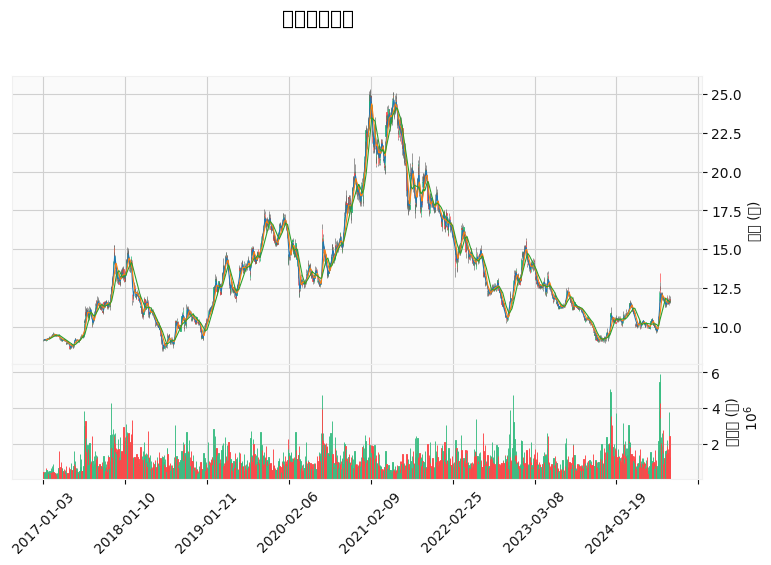

In [16]:
# 配置蜡烛图样式
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', gridstyle='-', rc={'font.size': 10})

# 绘制蜡烛图
mpf.plot(
    data,
    type='candle',  # 蜡烛图类型
    style=mpf_style,
    volume=True,    # 显示成交量
    title='股票价格走势',
    ylabel='价格 (元)',
    ylabel_lower='成交量 (手)',
    datetime_format='%Y-%m-%d',  # 日期格式
    figratio=(10, 6),  # 图表比例
    mav=(5, 10, 20)    # 移动平均线 (可选)
)


In [13]:
article_epu_index_df = ak.article_epu_index(symbol="China")  # 注意单词第一个字母大写
# 假设 df 是你的 DataFrame
pd.set_option('display.max_rows', None)  # None 表示不限制行数
print(article_epu_index_df)

     year  month  China_Policy_Index
0    1995      1          192.911910
1    1995      2          193.987850
2    1995      3           88.227035
3    1995      4          131.034710
4    1995      5          177.096860
5    1995      6           79.096237
6    1995      7           61.732692
7    1995      8           52.983125
8    1995      9           76.820086
9    1995     10          153.871300
10   1995     11          100.061500
11   1995     12          143.116690
12   1996      1          128.429460
13   1996      2          111.158190
14   1996      3           69.440676
15   1996      4           63.357444
16   1996      5           84.173360
17   1996      6           36.838809
18   1996      7           47.684813
19   1996      8           55.953546
20   1996      9           51.041031
21   1996     10           53.619759
22   1996     11           85.299863
23   1996     12           69.185185
24   1997      1           88.323707
25   1997      2          115.348680
2